<a href="https://colab.research.google.com/github/andersonkstro/Data-Science/blob/master/ProjetoHamburgueria207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset da Hamburgueria2047 do município de Marabá-PA.

Vamos analisar as vendas por dias da semana, meses do ano e suas categorias.

---



In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from datetime import date
import datetime as dt

sns.set_style()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
%matplotlib inline

# New Section

# New Section

In [0]:
# Importando o dataset da Hamburgueria 207

df= pd.read_excel('/content/Historico_Itens_Vendidos de 01-01-18 à 31-12-18.xls')

In [4]:
df.head()

,Data/Hora Item,Qtd.,Valor Un. Item,Valor. Tot. Item,Tipo de Item,Nome Prod.,Tipo Prod.,Cat. Prod.,Valor Prod.,Cod. Ped.,Núm. Mesa/Com.,Data Ab. Ped.,Data Fec. Ped.,Tipo Ped.,Stat. Ped.
0,2018-03-05 19:03:29.296,1.0,17.0,17.0,Produto,207 +BACON,Produto,Hambúrgueres,17.0,6187.0,NaN,2018-03-05 19:02:22.138,2018-03-05 19:58:54.006,Delivery,Finalizado Pago
1,2018-03-05 19:06:18.572,1.0,22.0,22.0,Produto,207 PRIME,Produto,Hambúrgueres,22.0,6188.0,NaN,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery,Finalizado Pago
2,2018-03-05 19:06:24.578,1.0,3.0,3.0,Produto,COCA COLA LATA,Produto,Refrigerantes,4.0,6188.0,NaN,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery,Finalizado Pago
3,2018-03-05 19:10:04.523,1.0,15.0,15.0,Produto,207 CLÁSSICO,Produto,Hambúrgueres,15.0,6189.0,NaN,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery,Finalizado Pago
4,2018-03-05 19:10:04.523,1.0,1.5,1.5,Complemento,QUEIJO ADICIONAL,Complemento,Complemento,1.5,6189.0,NaN,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery,Finalizado Pago


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10533 entries, 0 to 10532
Data columns (total 15 columns):
Data/Hora Item      10532 non-null datetime64[ns]
Qtd.                10532 non-null float64
Valor Un. Item      10532 non-null float64
Valor. Tot. Item    10532 non-null float64
Tipo de Item        10532 non-null object
Nome Prod.          10532 non-null object
Tipo Prod.          10532 non-null object
Cat. Prod.          10532 non-null object
Valor Prod.         10532 non-null float64
Cod. Ped.           10532 non-null float64
Núm. Mesa/Com.      2267 non-null float64
Data Ab. Ped.       10532 non-null datetime64[ns]
Data Fec. Ped.      10532 non-null datetime64[ns]
Tipo Ped.           10532 non-null object
Stat. Ped.          10532 non-null object
dtypes: datetime64[ns](3), float64(6), object(6)
memory usage: 1.2+ MB


**Tamanho do Dataset.**

---



---



In [8]:
df.shape

(10533, 15)

**Verificando os valores missings(nulos/NaN).**

---



---



In [9]:
df.isnull().sum()

Data/Hora Item         1
Qtd.                   1
Valor Un. Item         1
Valor. Tot. Item       1
Tipo de Item           1
Nome Prod.             1
Tipo Prod.             1
Cat. Prod.             1
Valor Prod.            1
Cod. Ped.              1
Núm. Mesa/Com.      8266
Data Ab. Ped.          1
Data Fec. Ped.         1
Tipo Ped.              1
Stat. Ped.             1
dtype: int64

** % de Colunas nulas.**

---



---



In [10]:
df.isnull().sum() / df.shape[0]

Data/Hora Item      0.000095
Qtd.                0.000095
Valor Un. Item      0.000095
Valor. Tot. Item    0.000095
Tipo de Item        0.000095
Nome Prod.          0.000095
Tipo Prod.          0.000095
Cat. Prod.          0.000095
Valor Prod.         0.000095
Cod. Ped.           0.000095
Núm. Mesa/Com.      0.784772
Data Ab. Ped.       0.000095
Data Fec. Ped.      0.000095
Tipo Ped.           0.000095
Stat. Ped.          0.000095
dtype: float64

**As medidas de tendências do Dataset. **

---



---



In [13]:
df.describe()

,Qtd.,Valor Un. Item,Valor. Tot. Item,Valor Prod.,Cod. Ped.,Núm. Mesa/Com.
count,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,2267.000000
mean,1.090011,13.239271,14.525826,13.475978,8922.573111,7.341420
std,0.360771,7.106302,9.562887,6.910087,1503.848371,18.970337
min,1.000000,1.000000,1.000000,1.000000,6187.000000,1.000000
25%,1.000000,5.000000,5.500000,6.000000,7636.000000,1.000000
50%,1.000000,15.000000,15.000000,16.000000,8943.500000,2.000000
75%,1.000000,20.000000,20.000000,20.000000,10287.250000,7.000000
max,9.000000,30.000000,100.000000,22.000000,11369.000000,102.000000


**Vamos agora fazer algumas alterações no Dataset para extrair alguns insights. **

---



---



---



**Removendo as colunas com valores missing.**

In [0]:

df.drop(["Cod. Ped."], axis=1, inplace=True)
df.drop(["Núm. Mesa/Com."], axis=1, inplace=True)

**Verificando as colunas do nosso Dataset. **

---



---



---



In [16]:
df.columns

Index(['Data/Hora Item', 'Qtd.', 'Valor Un. Item', 'Valor. Tot. Item',
       'Tipo de Item', 'Nome Prod.', 'Tipo Prod.', 'Cat. Prod.', 'Valor Prod.',
       'Data Ab. Ped.', 'Data Fec. Ped.', 'Tipo Ped.', 'Stat. Ped.'],
      dtype='object')

**Renomeando as mesmas.**

---



---



---



In [0]:
colunaNova = ['Data', 'Qtd', 'ValorUnidade', 'TotalUnidade',
       'TipoItem', 'Produto', 'TipoProduto', 'Categoria', 'ValorProduto',
       'HoraAbertPed', 'HoraFechPed', 'TipoPedido', 'StatuSPedido']
df.columns = colunaNova

**Verificando as colunas novamente com os novos nomes.**

---



---



---



In [18]:
df.columns

Index(['Data', 'Qtd', 'ValorUnidade', 'TotalUnidade', 'TipoItem', 'Produto',
       'TipoProduto', 'Categoria', 'ValorProduto', 'HoraAbertPed',
       'HoraFechPed', 'TipoPedido', 'StatuSPedido'],
      dtype='object')

**Removendo a coluna que possui os mesmos dados da coluna TipoPedido.**
**E removendo a coluna status Pedidos.**

---



---



In [0]:
df.drop(["TipoItem"], axis=1, inplace=True)
df.drop(["StatuSPedido"], axis=1, inplace=True)

**Vejamos agora as últimas linhas do Dataset. **

---



---



In [20]:
df.tail()

,Data,Qtd,ValorUnidade,TotalUnidade,Produto,TipoProduto,Categoria,ValorProduto,HoraAbertPed,HoraFechPed,TipoPedido
10528,2018-12-30 22:37:39.490,1.0,5.0,5.0,* Excluído * SUCO,Produto,Sucos,5.0,2018-12-30 22:34:25.351,2018-12-30 23:12:11.181,Mesa/Comanda
10529,2018-12-30 22:41:57.277,1.0,2.5,2.5,AGUA MINERAL 500ML,Produto,Refrigerantes,2.5,2018-12-30 22:34:25.351,2018-12-30 23:12:11.181,Mesa/Comanda
10530,2018-12-30 22:41:59.290,1.0,2.5,2.5,AGUA MINERAL 500ML,Produto,Refrigerantes,2.5,2018-12-30 22:34:25.351,2018-12-30 23:12:11.181,Mesa/Comanda
10531,2018-12-30 22:47:23.911,1.0,6.5,6.5,COCA COLA 1 LT,Produto,Refrigerantes,6.5,2018-12-30 22:30:08.793,2018-12-30 23:01:08.671,Mesa/Comanda
10532,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN


**Excluindo as informações da última linha do Dataset, pois estão com valores NaN( missings). **

---



---



In [0]:
df.drop([10532], axis=0, inplace=True)

**Vamos agora verificar os valores nulos novamente do nosso conjunto de dados.**

---



---



In [24]:
df.isnull().sum()

Data            0
Qtd             0
ValorUnidade    0
TotalUnidade    0
Produto         0
TipoProduto     0
Categoria       0
ValorProduto    0
HoraAbertPed    0
HoraFechPed     0
TipoPedido      0
dtype: int64

**Criaremos algumas colunas para extrair dias,meses e horas.**

---



---



---



In [0]:
# colocando a variavel data como date.time

df["Data"] = pd.to_datetime(df["Data"])

In [0]:
# Extraindo e criando as horas das colunas aberturaped e fechamentoped.

df["HoraAbertura"] = df["HoraAbertPed"].apply(lambda x:dt.time(x.hour, x.minute, x.second))
df["HoraFechamento"] = df["HoraFechPed"].apply(lambda x:dt.time(x.hour, x.minute, x.second))

In [0]:
# Extraindo e criando colunas de Dias da Semana, Mês e Hora.

df["DiaSemana"] = df["Data"].apply(lambda x: x.dayofweek)
df["Mes"] = df["Data"].apply(lambda x: x.month)
df["Hora"] = df["Data"].apply(lambda x: x.hour)

In [0]:
# Criando um dicionário com os nomes dos dias da semana

dias = {0:"Seg",1:"Ter",2:"Qua",3:"Qui",4:"Sex",5:"Sab",6:"Dom"}

#Criando um dicionário com as inicais dos meses do ano.
meses = {1:"Jan",2:"Fev",3:"Mar",4:"Abr",5:"Mai",6:"Jun",7:"Jul",8:'Ago',9:"Set",10:"Out",11:"Nov",12:"Dez"}

In [0]:
# Atribuindo os nomes para a coluna DiaSemana

df["DiaSemana"] = df["DiaSemana"].map(dias)

# Atribuindo os nomes para os meses.

df["Mes"] = df["Mes"].map(meses)

**Visulizando o nosso conjunto de dados com as informações novas.**

---



---



---



In [33]:
df.head()

,Data,Qtd,ValorUnidade,TotalUnidade,Produto,TipoProduto,Categoria,ValorProduto,HoraAbertPed,HoraFechPed,TipoPedido,HoraAbertura,HoraFechamento,DiaSemana,Mes,Hora
0,2018-03-05 19:03:29.296,1.0,17.0,17.0,207 +BACON,Produto,Hambúrgueres,17.0,2018-03-05 19:02:22.138,2018-03-05 19:58:54.006,Delivery,19:02:22,19:58:54,Seg,Mar,19
1,2018-03-05 19:06:18.572,1.0,22.0,22.0,207 PRIME,Produto,Hambúrgueres,22.0,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery,19:06:00,19:59:16,Seg,Mar,19
2,2018-03-05 19:06:24.578,1.0,3.0,3.0,COCA COLA LATA,Produto,Refrigerantes,4.0,2018-03-05 19:06:00.273,2018-03-05 19:59:16.501,Delivery,19:06:00,19:59:16,Seg,Mar,19
3,2018-03-05 19:10:04.523,1.0,15.0,15.0,207 CLÁSSICO,Produto,Hambúrgueres,15.0,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery,19:09:11,19:58:35,Seg,Mar,19
4,2018-03-05 19:10:04.523,1.0,1.5,1.5,QUEIJO ADICIONAL,Complemento,Complemento,1.5,2018-03-05 19:09:11.997,2018-03-05 19:58:35.722,Delivery,19:09:11,19:58:35,Seg,Mar,19


**Visualizando um pairplot para analisar as variaveis.**

---



---



---



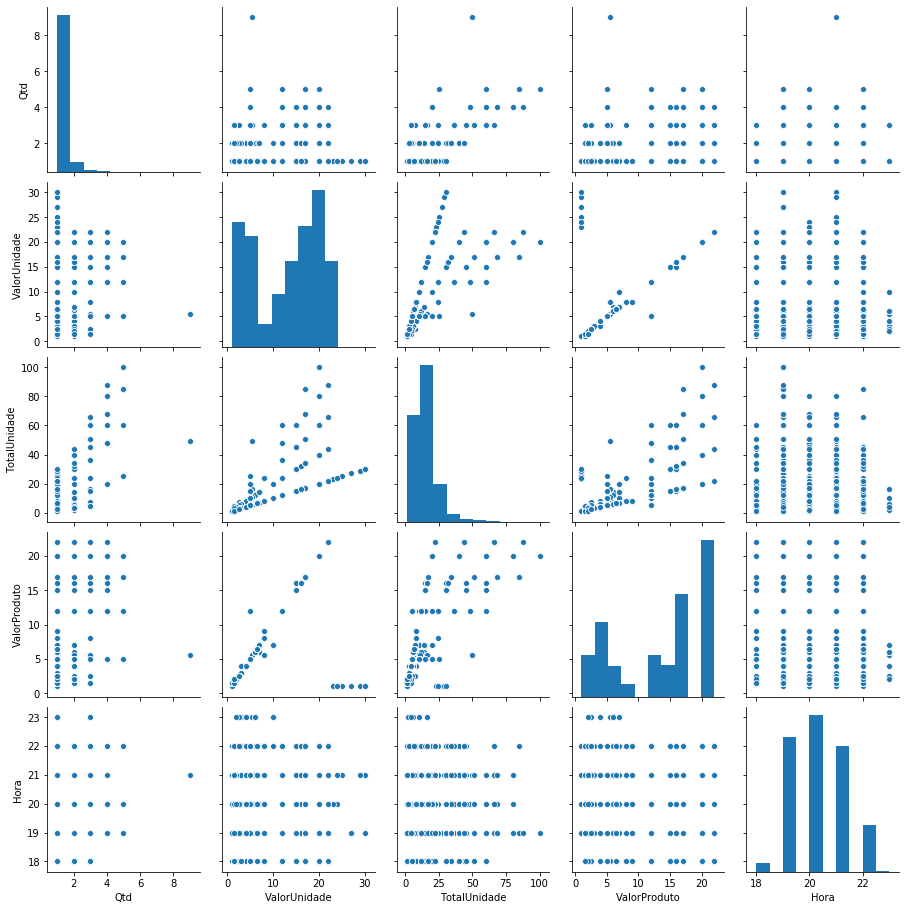

In [38]:
sns.pairplot(df)

## **Criando alguns gráficos para analises.**

Text(0.5, 1.0, 'Pedidos por Horario')

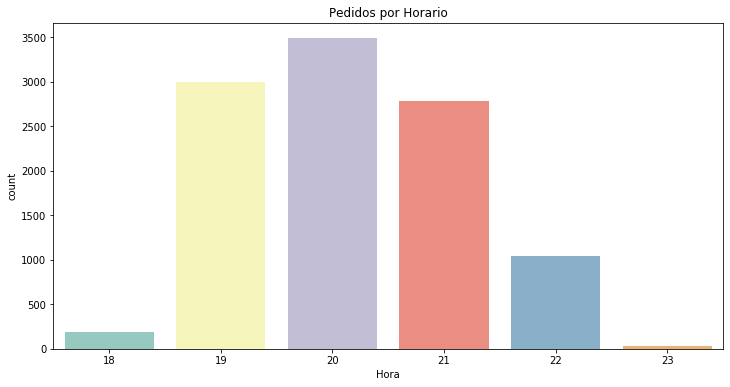

In [41]:
# Criando graficos para extrair informações

plt.figure(figsize=(12,6))
sns.countplot(x = "Hora", data=df, palette="Set3")
plt.title("Pedidos por Horario")

**Notamos acima que a maior concentração de pedidos estão nos horários entre as 18:30 até as 21:30.**

Text(0.5, 1.0, 'Pedidos por Mês')

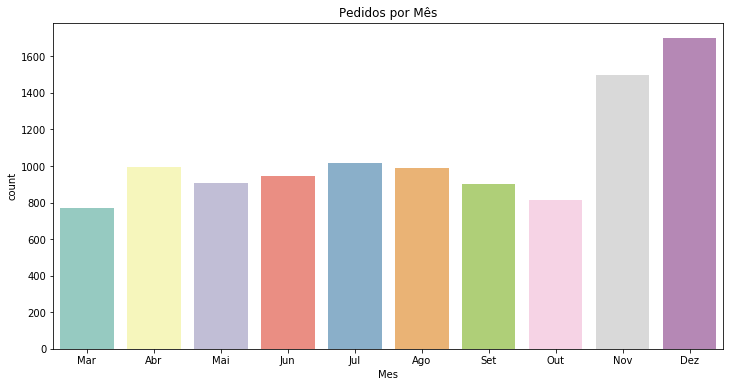

In [43]:
plt.figure(figsize=(12,6))
sns.countplot(x="Mes", data=df, palette="Set3")
plt.title("Pedidos por Mês")

**O gráfico pmostra que a maior concentração de pedidos está no mês de Dezembro. Em Abril houve um volume diferente em relação aos demais e Novembro disparou.**

Text(0.5, 1.0, 'Por dia de Semana')

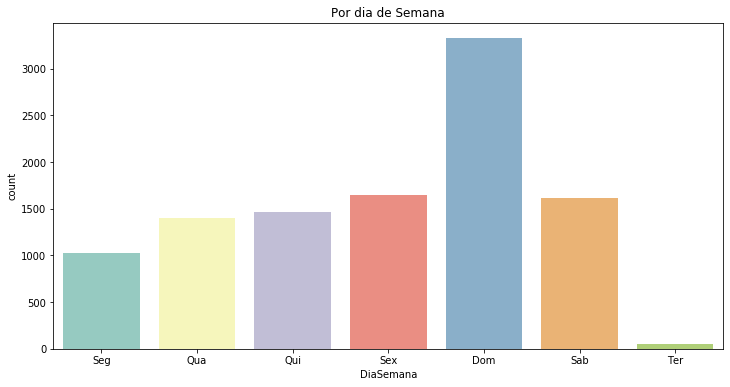

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(x= "DiaSemana", data=df, palette="Set3")
plt.title("Por dia de Semana")

**Domingo é lider de pedidos.**

---



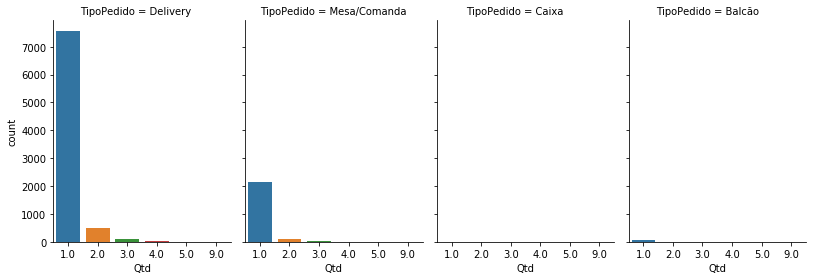

In [46]:
sns.catplot(x="Qtd", col="TipoPedido",
                data=df, kind="count",
                height=4, aspect=.7);

**A maioria dos pedidos, ou seja, 81.77% são feitos por telefone/aplicativo(Delivery), sem a necessidade de loja física.**

---



In [47]:
df["TipoPedido"].value_counts() / 100

Delivery        81.77
Mesa/Comanda    22.67
Balcão           0.80
Caixa            0.08
Name: TipoPedido, dtype: float64

Text(0.5, 1.0, 'Por Categoria')

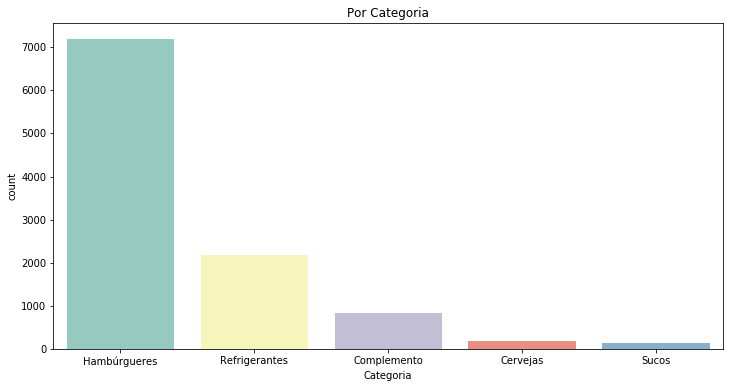

In [48]:
plt.figure(figsize=(12,6))
sns.countplot(x="Categoria", data=df, palette="Set3")
plt.title("Por Categoria")

**Podemos notar que não existe uma relação de pedidos com refrigerantes significativa. As pessoas compram mais hamburgueres do que um pedido "casado", ou seja, hamburguer + refrigerante.**

---



---



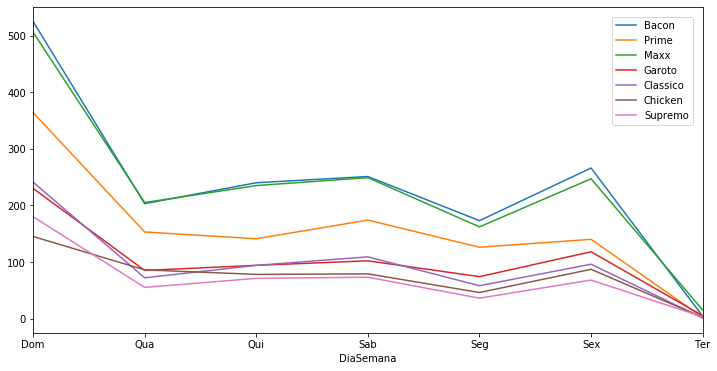

In [50]:
plt.figure(figsize=(12,6))
df[df['Produto']=='207 +BACON'].groupby('DiaSemana').count()['Categoria'].plot()
df[df['Produto']=='207 PRIME'].groupby('DiaSemana').count()['Categoria'].plot()
df[df['Produto']=='207 MAXX'].groupby('DiaSemana').count()['Categoria'].plot()
df[df['Produto']=="207 GAROTO"].groupby("DiaSemana").count()["Categoria"].plot()
df[df['Produto']=="207 CLÁSSICO"].groupby("DiaSemana").count()["Categoria"].plot()
df[df['Produto']=="207 CHICKEN"].groupby("DiaSemana").count()["Categoria"].plot()
df[df['Produto']=="207 SUPREMO"].groupby("DiaSemana").count()["Categoria"].plot()
plt.legend(["Bacon", "Prime", "Maxx","Garoto","Classico","Chicken","Supremo"], loc = 0, borderaxespad=1)

**Ranking dos Hamburgueres.** 

---



---



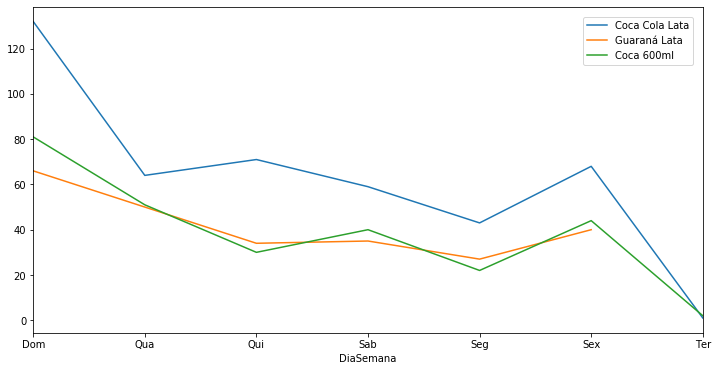

In [51]:
plt.figure(figsize=(12,6))
df[df['Produto']=='COCA COLA LATA'].groupby('DiaSemana').count()['Categoria'].plot()
df[df['Produto']=="GUARANÁ ANTÁRTICA LATA"].groupby("DiaSemana").count()["Categoria"].plot()
df[df['Produto']=="COCA COLA 600ML"].groupby("DiaSemana").count()["Categoria"].plot()
plt.legend(["Coca Cola Lata", "Guaraná Lata","Coca 600ml"], loc = 0, borderaxespad=1)

**Ranking dos refrigerantes.**

---



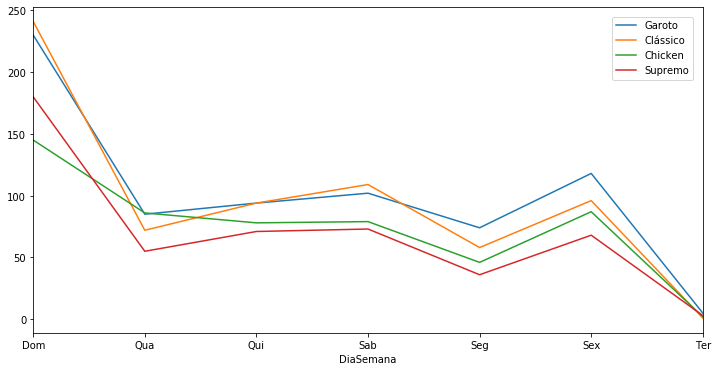

In [0]:
plt.figure(figsize=(12,6))

plt.legend(["Garoto","Clássico","Chicken","Supremo"], loc=0, borderaxespad=1)